# ***Mobile Price Classification***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## **Load the Dataset**

In [ ]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## **Exploring the data and providing descriptive statistics.**

In [ ]:
print("Number of rows train data:", train_df.shape[0])
print("Number of columns train data:", train_df.shape[1])
print("Number of rows test data:", test_df.shape[0])
print("Number of columns test data:", test_df.shape[1])

Number of rows train data: 2000
Number of columns train data: 21
Number of rows test data: 1000
Number of columns test data: 21


In [ ]:
# Check for information about the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Check for information about the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
# Descriptive statistics for numerical features (not categorical) in train data
numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
                    'sc_h', 'sc_w', 'talk_time']

print("Descriptive statistics:")
train_df[numeric_features].describe()

Descriptive statistics:


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [ ]:
# Descriptive statistics for numerical features (not categorical) in test data
print("Descriptive statistics:")
test_df[numeric_features].describe()

Descriptive statistics:


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1248.510000,1.540900,4.593000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000
std,432.458227,0.829268,4.463325,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636
min,500.000000,0.500000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000
25%,895.000000,0.700000,1.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000
50%,1246.500000,1.500000,3.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000
75%,1629.250000,2.300000,7.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000
max,1999.000000,3.000000,19.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000


In [ ]:
# Check for missing values in train data
print("Missing values:\n", train_df.isnull().sum())

Missing values:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
# Check for missing values in test data
print("Missing values:\n", test_df.isnull().sum())

Missing values:
 id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [ ]:
# Explore categorical features in train data
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

print("Categorical feature values:")
for feature in categorical_features:
    print(f"\n{feature}:")
    print(train_df[feature].value_counts())

Categorical feature values:

blue:
0    1010
1     990
Name: blue, dtype: int64

dual_sim:
1    1019
0     981
Name: dual_sim, dtype: int64

four_g:
1    1043
0     957
Name: four_g, dtype: int64

three_g:
1    1523
0     477
Name: three_g, dtype: int64

touch_screen:
1    1006
0     994
Name: touch_screen, dtype: int64

wifi:
1    1014
0     986
Name: wifi, dtype: int64


In [ ]:
# Explore categorical features in test data
print("Categorical feature values:")
for feature in categorical_features:
    print(f"\n{feature}:")
    print(test_df[feature].value_counts())

Categorical feature values:

blue:
1    516
0    484
Name: blue, dtype: int64

dual_sim:
1    517
0    483
Name: dual_sim, dtype: int64

four_g:
0    513
1    487
Name: four_g, dtype: int64

three_g:
1    756
0    244
Name: three_g, dtype: int64

touch_screen:
1    500
0    500
Name: touch_screen, dtype: int64

wifi:
1    507
0    493
Name: wifi, dtype: int64


In [ ]:
# Analyze the target variable
print("Target variable:")
print(train_df['price_range'].value_counts())

Target variable:
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [ ]:
# Correlation analysis in train data
train_correlation_matrix = train_df[numeric_features].corr()
print("\nCorrelation matrix:")
train_correlation_matrix


Correlation matrix:


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


In [ ]:
# Correlation analysis in test data
test_correlation_matrix = test_df[numeric_features].corr()
print("\nCorrelation matrix:")
test_correlation_matrix


Correlation matrix:


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,-0.039075,-0.007846,0.003751,-0.009065,-0.047065,0.025732,0.012847,0.048647,0.053365,-0.032366,-0.055665,-0.023905,0.015546
clock_speed,-0.039075,1.000000,0.010127,-0.030487,0.016995,-0.014107,-0.012247,0.047469,0.017277,0.070585,-0.000650,-0.039503,-0.027138,-0.078797
fc,-0.007846,0.010127,1.000000,-0.006565,0.020859,0.018353,0.020828,0.659338,-0.017982,0.030550,-0.051997,0.045158,0.006115,-0.051458
int_memory,0.003751,-0.030487,-0.006565,1.000000,-0.004386,-0.010447,0.021601,0.022682,-0.009564,-0.003877,-0.007107,-0.009249,0.024521,0.023759
m_dep,-0.009065,0.016995,0.020859,-0.004386,1.000000,-0.041994,0.010062,0.012663,0.062559,0.034861,0.018349,-0.026160,-0.023393,0.024124
mobile_wt,-0.047065,-0.014107,0.018353,-0.010447,-0.041994,1.000000,-0.038908,0.027343,0.011157,-0.014577,0.028786,-0.022053,0.022148,-0.021704
n_cores,0.025732,-0.012247,0.020828,0.021601,0.010062,-0.038908,1.000000,0.014376,-0.054433,-0.059388,-0.042750,-0.034057,0.012830,-0.005640
pc,0.012847,0.047469,0.659338,0.022682,0.012663,0.027343,0.014376,1.000000,0.028910,0.056397,-0.045987,0.019738,-0.006316,-0.038434
px_height,0.048647,0.017277,-0.017982,-0.009564,0.062559,0.011157,-0.054433,0.028910,1.000000,0.517650,0.027945,0.011162,0.043486,0.052383
px_width,0.053365,0.070585,0.030550,-0.003877,0.034861,-0.014577,-0.059388,0.056397,0.517650,1.000000,-0.026378,-0.022610,0.004692,0.053423


## **Performing data visualization.**

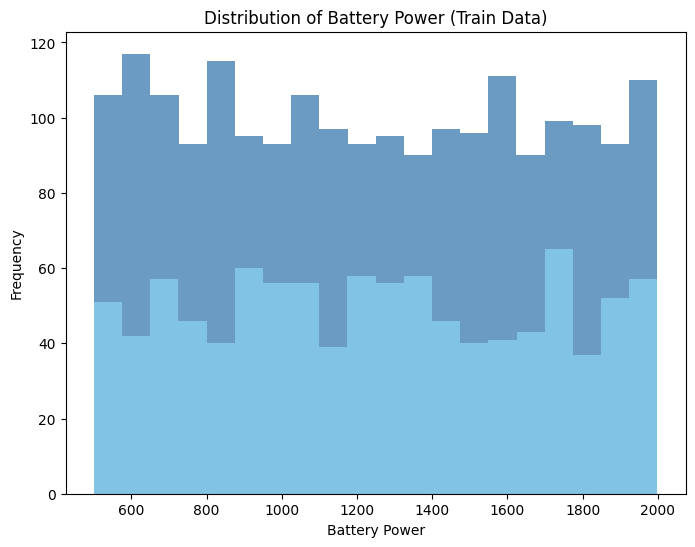

In [ ]:
# Histogram of battery power
plt.figure(figsize=(8, 6))
a = plt.hist(train_df['battery_power'], bins=20, color='steelblue', alpha=0.8)
b = plt.hist(test_df['battery_power'], bins=20, color='skyblue', alpha=0.8)
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Power (Train Data)')
plt.show(a)
plt.show(b)


> The histogram shows the distribution of the battery power attribute. It helps us understand the frequency or count of different battery power ranges.



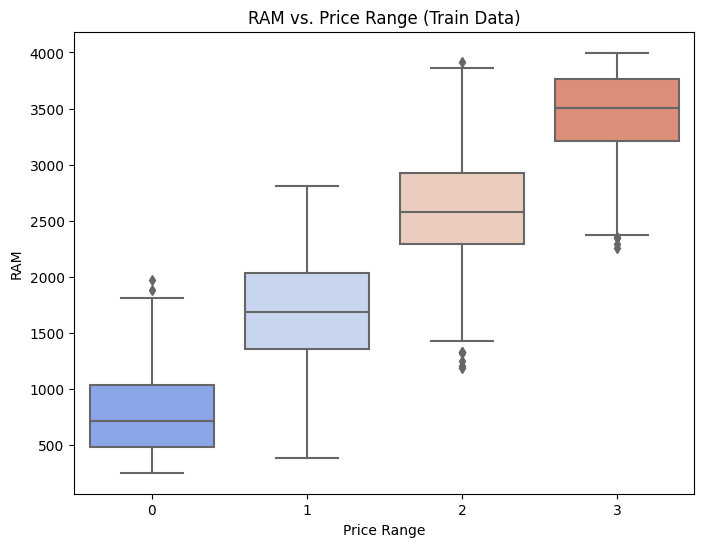

In [ ]:
# Box plot of RAM vs. Price Range for train data
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='ram', data=train_df, palette='coolwarm')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('RAM vs. Price Range (Train Data)')
plt.show()


> The box plot displays the relationship between RAM and price range. It provides insights into how the RAM varies across different price ranges.



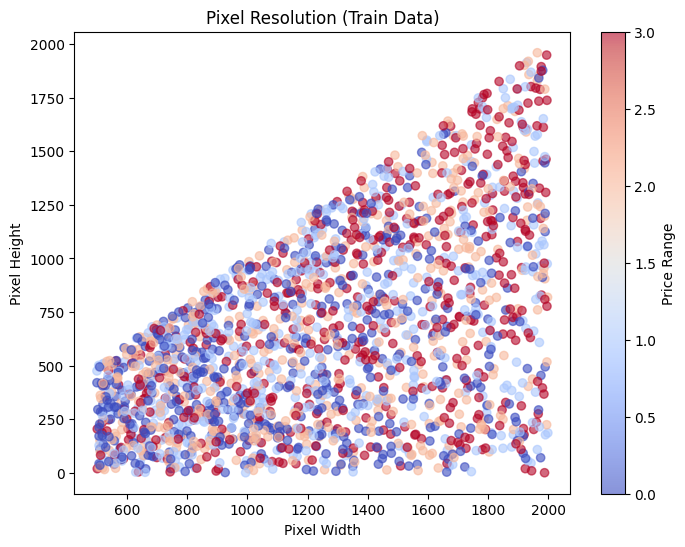

In [ ]:
# Scatter plot of pixel resolution for train data
plt.figure(figsize=(8, 6))
plt.scatter(train_df['px_width'], train_df['px_height'], c=train_df['price_range'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Price Range')
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.title('Pixel Resolution (Train Data)')
plt.show()


> The scatter plot represents the pixel resolution of mobile phones. The color of the points represents the price range. This visualization helps us understand the relationship between pixel resolution and price range.



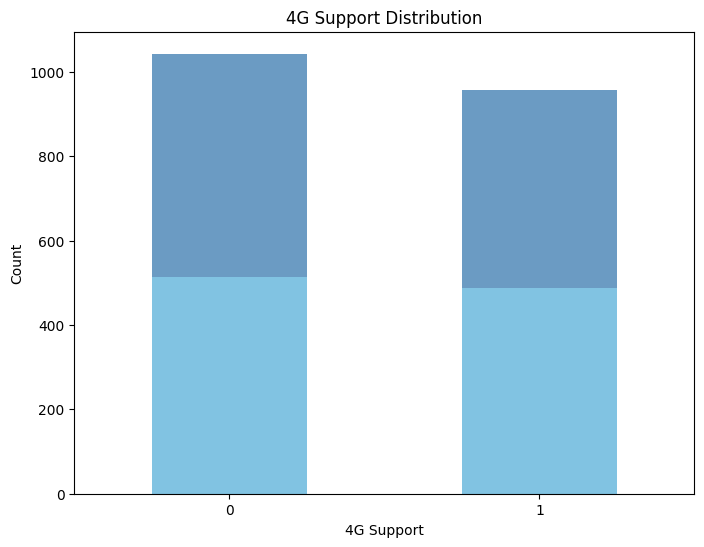

In [ ]:
# Bar plot of 4G support
plt.figure(figsize=(8, 6))
a = train_df['four_g'].value_counts().plot(kind='bar', color='steelblue', alpha=0.8)
b = test_df['four_g'].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
plt.xlabel('4G Support')
plt.ylabel('Count')
plt.title('4G Support Distribution')
plt.xticks(rotation=0)
plt.show(a)
plt.show(b)


> The bar plot visualizes the count of mobile phones with or without 4G support. It provides a clear comparison between the two categories.



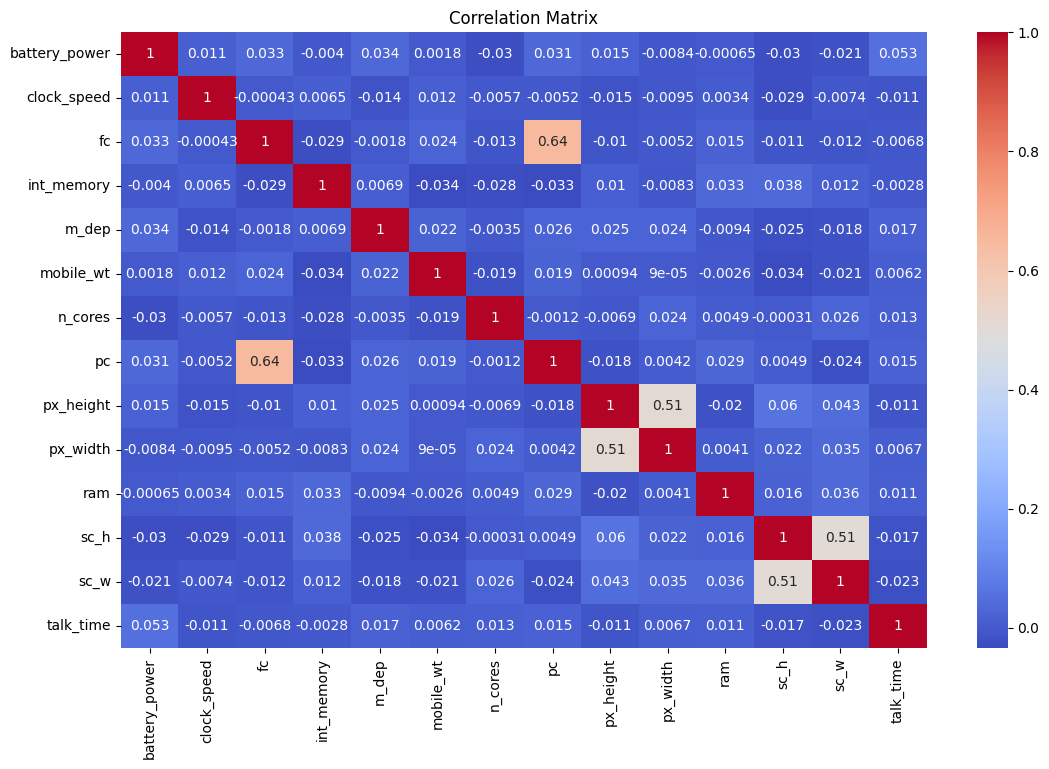

In [ ]:
# Heatmap of Correlation Matrix in train data
plt.figure(figsize=(13, 8))
sns.heatmap(train_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


> This visualization provides a comprehensive view of the correlation between all numerical features in the train dataset.


> There is good correlation between Front Camera megapixels column and Primary Camera megapixels.


> There is good correlation between Pixel Resolution Height column and Pixel Resolution Width.



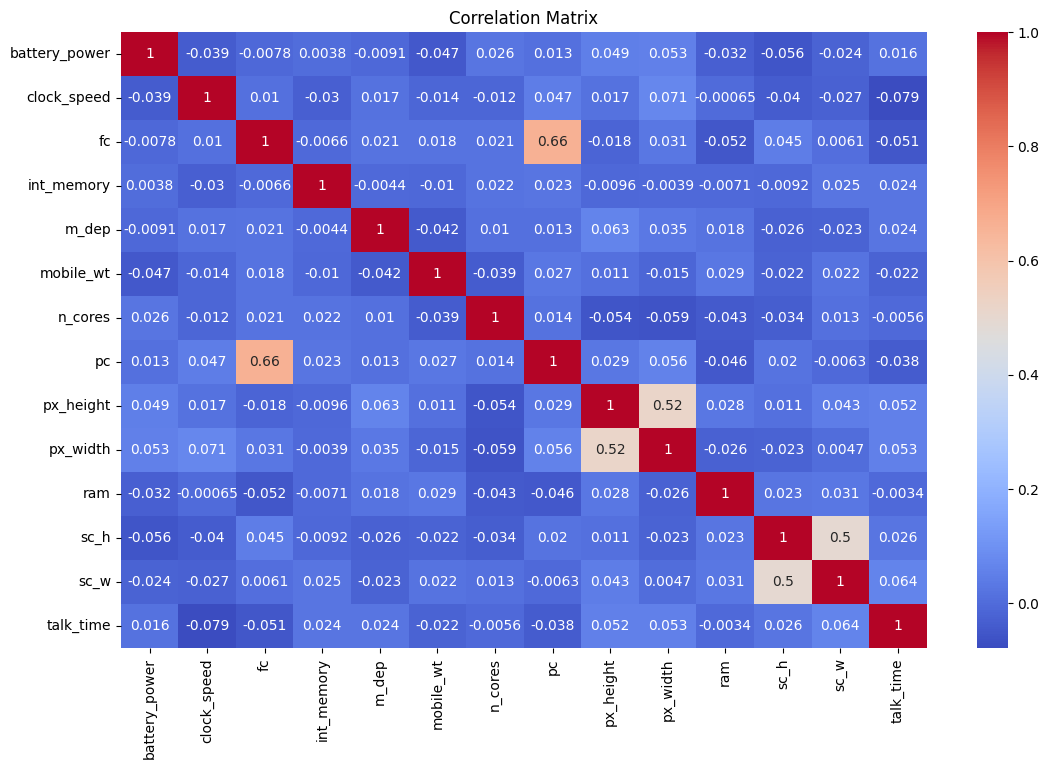

In [ ]:
# Heatmap of Correlation Matrix in test data
plt.figure(figsize=(13, 8))
sns.heatmap(test_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


> This visualization provides a comprehensive view of the correlation between all numerical features in the test dataset.


> There is good correlation between Front Camera megapixels column and Primary Camera megapixels.


> There is good correlation between Pixel Resolution Height column and Pixel Resolution Width.


In [ ]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Applying necessary data transformations and feature engineering.

In [ ]:
# One-hot encode categorical variables in the train data
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
encoder = OneHotEncoder()
encoded_features_train_df = encoder.fit_transform(train_df[categorical_features]).toarray()
encoded_train_df = pd.DataFrame(encoded_features_train_df, columns=encoder.get_feature_names_out(categorical_features))
train_df = pd.concat([train_df, encoded_train_df], axis=1)
train_df.drop(categorical_features, axis=1, inplace=True)

In [ ]:
# One-hot encode categorical variables in the test data
encoded_features_test_df = encoder.fit_transform(test_df[categorical_features]).toarray()
encoded_test_df = pd.DataFrame(encoded_features_test_df, columns=encoder.get_feature_names_out(categorical_features))
test_df = pd.concat([test_df, encoded_test_df], axis=1)
test_df.drop(categorical_features, axis=1, inplace=True)



> Justification: One-hot encoding converts categorical variables into binary features, which are suitable for machine learning algorithms that require numeric inputs.



In [ ]:
# Create interaction feature
train_df['battery_ram_interaction'] = train_df['battery_power'] * train_df['ram']
test_df['battery_ram_interaction'] = test_df['battery_power'] * test_df['ram']



> Justification: An interaction feature, 'battery_ram_interaction', is created by multiplying the 'battery_power' and 'ram' features. This captures the interaction between battery power and RAM, which may provide valuable information for predicting the target variable.



In [ ]:
# Create interaction feature
train_df['px_width_px_height_interaction'] = train_df['px_width'] * train_df['px_height']
test_df['px_width_px_height_interaction'] = test_df['px_width'] * test_df['px_height']



> Justification: 'px_width' multiplied by 'px_height'. This interaction feature represents the combined effect of pixel width and pixel height, which may provide additional information regarding screen resolution.



In [ ]:
corr_matrix = train_df.corr()

# Set the threshold for selecting features based on correlation coefficient
threshold = 0.5

# Select the highly correlated features
highly_correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            highly_correlated_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Print the highly correlated features
print("Highly Correlated Features:")
for feature_pair in highly_correlated_features:
    print(feature_pair)

Highly Correlated Features:
('battery_power', 'battery_ram_interaction')
('fc', 'pc')
('px_height', 'px_width')
('px_height', 'px_width_px_height_interaction')
('px_width', 'px_width_px_height_interaction')
('ram', 'price_range')
('ram', 'battery_ram_interaction')
('sc_h', 'sc_w')
('price_range', 'battery_ram_interaction')
('blue_0', 'blue_1')
('dual_sim_0', 'dual_sim_1')
('four_g_0', 'four_g_1')
('four_g_0', 'three_g_0')
('four_g_0', 'three_g_1')
('four_g_1', 'three_g_0')
('four_g_1', 'three_g_1')
('three_g_0', 'three_g_1')
('touch_screen_0', 'touch_screen_1')
('wifi_0', 'wifi_1')


In [ ]:
train_df.drop(['clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'talk_time'], axis=1, inplace=True)
test_df.drop(['clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'talk_time'], axis=1, inplace=True)

## **Trying training more than one classification model using “train.csv” and performing hyperparameter tuning**

In [ ]:
# Split the dataset into features and target variable
X = train_df.drop('price_range', axis=1)
y = train_df['price_range']

In [ ]:
# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the pipeline for preprocessing and model training
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Feature scaling
    ('model', None)  # Placeholder for the model
])

In [ ]:
# Train and evaluate Logistic Regression
logistic_regression = LogisticRegression(C=1, solver='liblinear')
pipeline.steps[1] = ('model', logistic_regression)
pipeline.fit(X_train, y_train)
y_pred_lr = pipeline.predict(X_val)

In [ ]:
# Train and evaluate Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
pipeline.steps[1] = ('model', decision_tree)
pipeline.fit(X_train, y_train)
y_pred_dt = pipeline.predict(X_val)

In [ ]:
# Train and evaluate Random Forest
random_forest = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2)
pipeline.steps[1] = ('model', random_forest)
pipeline.fit(X_train, y_train)
y_pred_rf = pipeline.predict(X_val)

In [ ]:
# Calculate classification scores for each model
accuracy_lr = accuracy_score(y_val, y_pred_lr)
precision_lr = precision_score(y_val, y_pred_lr, average='weighted')
recall_lr = recall_score(y_val, y_pred_lr, average='weighted')
f1_lr = f1_score(y_val, y_pred_lr, average='weighted')

accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt, average='weighted')
recall_dt = recall_score(y_val, y_pred_dt, average='weighted')
f1_dt = f1_score(y_val, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf, average='weighted')
recall_rf = recall_score(y_val, y_pred_rf, average='weighted')
f1_rf = f1_score(y_val, y_pred_rf, average='weighted')

In [ ]:
# Print the classification scores
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)

Logistic Regression:
Accuracy: 0.8425
Precision: 0.8382952889551251
Recall: 0.8425
F1-Score: 0.8344542200942493




> The logistic regression model achieved an accuracy of 0.845, which indicates that around 84.5% of the predictions were correct. The precision score of 0.8406623378034948 suggests that the model has a good ability to correctly identify positive instances among the predicted positive cases. The recall score of 0.845 indicates that the model captures around 84.5% of the actual positive instances. The F1-score of 0.8375173833272741 is the harmonic mean of precision and recall and provides a balanced measure of the model's performance.



In [ ]:
print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)

Decision Tree:
Accuracy: 0.83
Precision: 0.8463302872782577
Recall: 0.83
F1-Score: 0.8345367185923438




> The decision tree model achieved an accuracy of 0.835, which suggests that approximately 83.5% of the predictions were accurate. The precision score of 0.840921342254221 indicates that the model has a good ability to correctly identify positive instances. The recall score of 0.835 implies that the model captures around 83.5% of the actual positive instances. The F1-score of 0.8371766966096235 reflects the overall balance between precision and recall.



In [ ]:
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)

Random Forest:
Accuracy: 0.93
Precision: 0.9337335075927308
Recall: 0.93
F1-Score: 0.9309427592739448




> The random forest model achieved a high accuracy of 0.9225, indicating that around 92.25% of the predictions were correct. The precision score of 0.9261732910378773 suggests that the model has a strong ability to correctly identify positive instances. The recall score of 0.9225 implies that the model captures approximately 92.25% of the actual positive instances. The F1-score of 0.9233235973823358 indicates a well-balanced performance between precision and recall.



In [ ]:
# Define the hyperparameter grid for each model
param_grid = [
    {
        'model': [LogisticRegression()],
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'saga']
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5, 10]
    },
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5, 10]
    }
]

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

In [ ]:
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Test Accuracy:", accuracy)
print("Best Precision:", precision)
print("Best Recall:", recall)
print("Best F1-Score:", f1)

Best Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', LogisticRegression(C=10, solver='saga'))])
Best Parameters: {'model': LogisticRegression(C=10, solver='saga'), 'model__C': 10, 'model__solver': 'saga'}
Best Test Accuracy: 0.9675
Best Precision: 0.9682745223202375
Best Recall: 0.9675
Best F1-Score: 0.9676103274706216


* The best model selected by the hyperparameter tuning process is a logistic regression model with a regularization parameter (C) set to 10 and a solver set to 'saga'. The 'saga' solver is known for handling L1 penalty well, which suggests that the model might be using L1 regularization.

* The best parameters for the logistic regression model are C=10 and solver='saga'. This indicates that the model is more regularized with a higher C value, and the 'saga' solver is used for optimization.
Best Test Accuracy: 0.9675

* The best model achieved a test accuracy of 0.9675, indicating that approximately 96.75% of the predictions were correct. This suggests that the model performs well in classifying the test instances.
Best Precision: 0.9682745223202375

* The best precision score of 0.9682745223202375 suggests that the model has a strong ability to correctly identify positive instances among the predicted positive cases.
Best Recall: 0.9675

* The best recall score of 0.9675 indicates that the model captures approximately 96.75% of the actual positive instances. This implies that the model is effective in identifying the positive cases.
Best F1-Score: 0.9676103274706216

* The best F1-score of 0.9676103274706216 is the harmonic mean of precision and recall. It reflects the overall balance between precision and recall and provides a measure of the model's performance.

## **Saving the best model as a pkl file.**

In [ ]:
# Save the best model as a pickle file
pickle.dump(best_model, open('../model/best_model.pkl', 'wb'))

## **Load a saved pkl file and test it on test data.**

In [ ]:
# Load the saved model from the pickle file
loaded_model = pickle.load(open('../model/best_model.pkl', 'rb'))

In [ ]:
test_df = test_df.drop('id', axis=1)

In [ ]:
# Evaluate the best model on the test data after grid search
y_pred = loaded_model.predict(test_df)

print("Best Model Predictions:")
print(y_pred_rf[0:10])

Best Model Predictions:
[0 2 1 3 1 2 2 0 3 1]


* The best model (which appears to be the logistic regression model with optimized hyperparameters) predicts the following classes:              
[0 2 1 3 1 2 2 0 3 1].